In [1]:
import sys
sys.path.insert(0, '../../utils/')

In [2]:
import torch
import numpy as np
import pandas as pd

In [3]:
from top_genes import mean_of_attention_heads
from attn_graph import build_attn_graph, plot_graph, build_and_plot_attn_graph

In [4]:
from graph_tool.all import *

In [5]:
LATENT_DIM = 50
ATTN_HEADS = 16

In [6]:
cellvgae_node_embs = np.load('PBMC3k/CellVGAE/cellvgae_node_embs.npy')
cellvgae_umap = np.load('PBMC3k/CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('PBMC3k/CellVGAE/cellvgae_clusters.npy')

In [7]:
layer_1_attn_edge_index = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_1_attention_edge_index.pt')
layer_1_attn_coeff = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_1_attention_coeff.pt')

In [8]:
layer_2_attn_edge_index = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_2_attention_edge_index.pt')
layer_2_attn_coeff = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_2_attention_coeff.pt')

In [9]:
layer_mean_attn_edge_index = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_mean_attention_edge_index.pt')
layer_mean_attn_coeff = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_mean_attention_coeff.pt')

In [10]:
layer_std_attn_edge_index = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_std_attention_edge_index.pt')
layer_std_attn_coeff = torch.load('PBMC3k/attn_layers_data/pbmc3k_hidden_layer_std_attention_coeff.pt')

In [11]:
seurat_df = pd.read_csv('PBMC3k/seurat_clusters.csv')

In [12]:
cell_types = seurat_df['Cluster'].values.tolist()

### Shorten names

In [13]:
cell_types = [x if x != 'CD14+ Mono' else 'CD14' for x in cell_types]
cell_types = [x if x != 'FCGR3A+ Mono' else 'FCG' for x in cell_types]
cell_types = [x if x != 'T' else 'CD4' for x in cell_types]
cell_types = [x if x != 'CD8 T' else 'CD8' for x in cell_types]
cell_types = [x if x != 'Platelet' else 'Plt' for x in cell_types]

In [14]:
num_cells = len(cell_types)

../../utils/attn_graph.py:32: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729002806/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  zero_degrees_indices = (degrees == 0).nonzero()


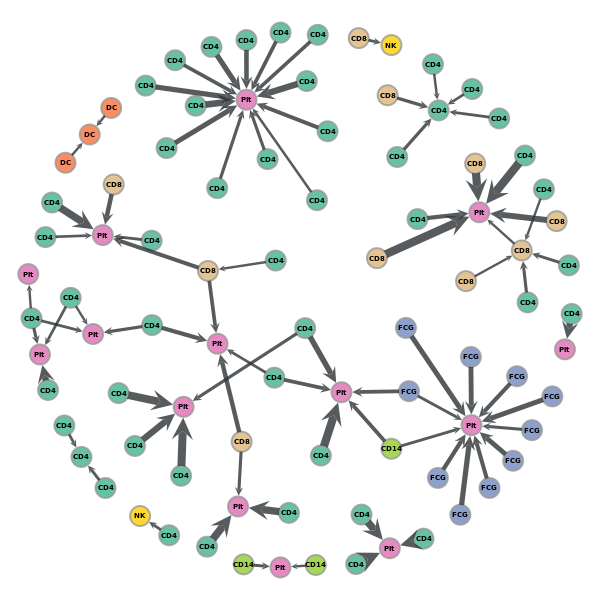

In [15]:
build_and_plot_attn_graph(layer_2_attn_edge_index, layer_2_attn_coeff, cell_types, 'layer_2', None, edge_scale_factor=10, k=80)